# EXERCISE 1B

You are working as a junior data scientist for a retail company that operates a large shopping mall. The marketing team wants to better understand customer segments so they can create more targeted promotions, loyalty programs, and personalized marketing strategies.

Your task is to analyze customer behavior using the Mall Customers Dataset, which includes information such as age, gender, annual income, and spending score. By applying K-Means clustering, you will identify natural customer groups based on their purchasing patterns.

<img src="https://cdn.theatlantic.com/media/mt/food/main%20Dmitrijs%20Dmitrijevs%20shutterstock_21143044.jpg"/>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
dataseturl = 'https://github.com/robitussin/CCADMACL_EXERCISES/blob/d10902a17b0a0ccfb79fe155ddeb19474d38da71/exercise1b/mallcustomers.csv?raw=true'


## 1. Load the Dataset


Load the Mall Customers dataset (upload or load from a URL).


In [5]:
df = pd.read_csv(dataseturl)

Display the first 5 rows using `head()`. `(5 pts)`

In [6]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Explore the Dataset

Print dataset shape. `(5 pts)`


In [7]:
print(df.shape)

(200, 5)


Show summary statistics using `describe()`. `(5 pts)`

In [8]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check for missing values. `(5 pts)`

In [9]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
AnnualIncome,0
SpendingScore,0


## 3. Select Features for Clustering

Use only the following columns:

- Annual Income (k$)
- Spending Score (1-100)


Create a new DataFrame with only these two columns. `(5 pts)`

In [10]:
X = df[['AnnualIncome', 'SpendingScore']]

Display the first 10 rows. `(5 pts)`

In [11]:
df.head(10)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## 4. Visualize Data `(10 pts)`

- Create a scatter plot of Annual Income vs Spending Score.
- Label axes properly.
- Add a title.

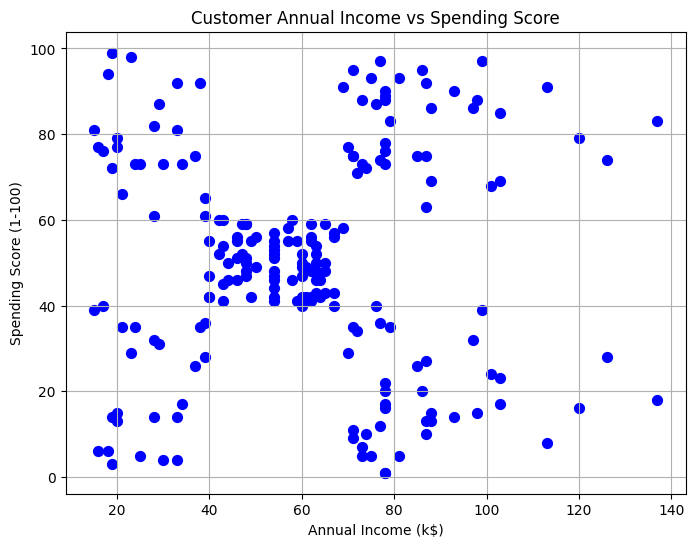

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], color='blue', s=50)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Annual Income vs Spending Score')
plt.grid(True)
plt.show()

## 5. Determine Optimal Number of Clusters `(10 pts)`

- Run K-Means for K = 1 to 10.
- Store WCSS (within-cluster sum of squares).
- Plot the elbow curve.

In [13]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


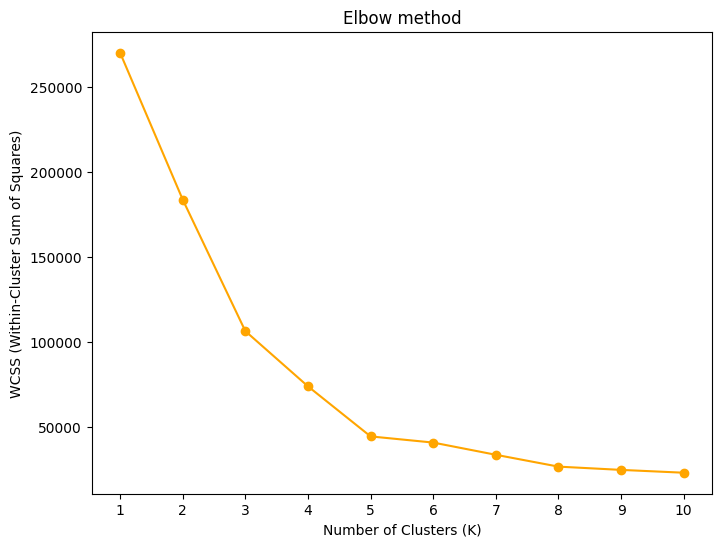

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', color='orange')
plt.title('Elbow method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.show()

## 6. Train K-Means with Optimal K `(10 pts)`


- Choose K based on the elbow method.
- Fit the K-Means model.
- Assign cluster labels to the dataset.
- Display first 10 labeled rows.

In [17]:
optimal_k = 5
#####################################

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

kmeans.fit(X)


df['Cluster'] = kmeans.labels_

df.head(10)


,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
5,6,Female,22,17,76,2
6,7,Female,35,18,6,4
7,8,Female,23,18,94,2
8,9,Male,64,19,3,4
9,10,Female,30,19,72,2


## 7. Visualize the Clusters `(10 pts)`

- Create a scatter plot showing the formed clusters.
- Color points by cluster.
- Plot cluster centroids as larger points.

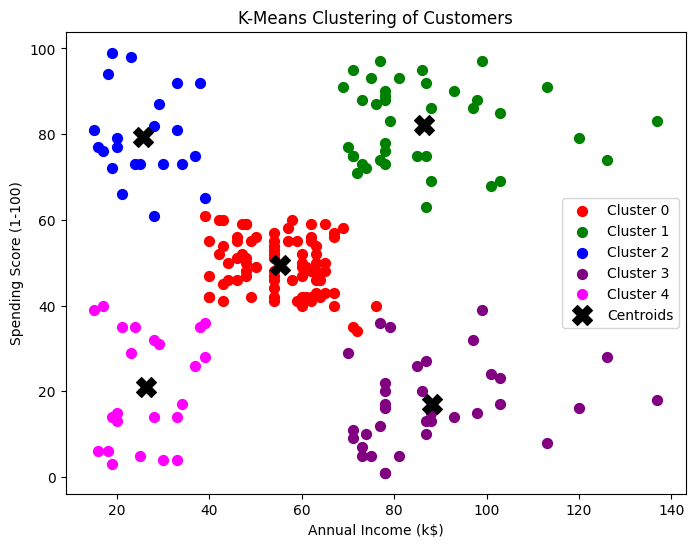

In [29]:
colors = ['red', 'green', 'blue', 'purple', 'magenta']

plt.figure(figsize=(8,6))

# Plot each cluster
for i in range(optimal_k):
    plt.scatter(
        X[df['Cluster'] == i]['AnnualIncome'],
        X[df['Cluster'] == i]['SpendingScore'],
        s=50,
        c=colors[i],
        label=f'Cluster {i}'
    )


plt.scatter(
    kmeans.cluster_centers_[:, 0],  # AnnualIncome
    kmeans.cluster_centers_[:, 1],  # SpendingScore
    s=200,                          # bigger size for centroids
    c='black',
    marker='X',
    label='Centroids'
)


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Customers')
plt.legend()
plt.show()


## 8. Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Which cluster represents high income, low spending users?
- Which cluster represents low income, high spending users?
- Which cluster might represent target customers for promotions?
- What business insights can you derive from the clusters?

In [ ]:
#Question 1- Purple cluster has the high income ratio but low on spending score
#Question 2- Blue has the lowest income ratio but high spending score
#Question 3- Red
#Question 4- High income clusters tend to spend less than the clusters who has low income but has a high spending score, so my insight is to those high income but low spending score we can send a email of product promotions of business item.

SyntaxError: invalid syntax (ipython-input-3425100197.py, line 1)

## 9. Add Age to the Clustering Model

Create a new 3D K-Means model using features: `(5 pts)`


- Age
- Annual Income
- Spending Score


In [34]:
k_3D = 5
X_3D = df[['Age', 'AnnualIncome', 'SpendingScore']]
kmeans_3D = KMeans(n_clusters=k_3D, init='k-means++', random_state=42)
kmeans_3D.fit(X_3D)
df['Cluster_3D'] = kmeans_3D.labels_
df.head(10)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster,Cluster_3D
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,0
5,6,Female,22,17,76,2,2
6,7,Female,35,18,6,4,0
7,8,Female,23,18,94,2,2
8,9,Male,64,19,3,4,0
9,10,Female,30,19,72,2,2


Visualize using a 3D scatter plot. `(5 pts)`

In [22]:
X_3D = df[['Age', 'AnnualIncome', 'SpendingScore']]

In [23]:
k_3D = 5  # change based on elbow method if needed

# Initialize K-Means
kmeans_3D = KMeans(n_clusters=k_3D, init='k-means++', random_state=42)

# Fit the model
kmeans_3D.fit(X_3D)

# Assign cluster labels to the dataset
df['Cluster_3D'] = kmeans_3D.labels_

In [24]:
df.head(10)

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Cluster,Cluster_3D
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,0
5,6,Female,22,17,76,2,2
6,7,Female,35,18,6,4,0
7,8,Female,23,18,94,2,2
8,9,Male,64,19,3,4,0
9,10,Female,30,19,72,2,2


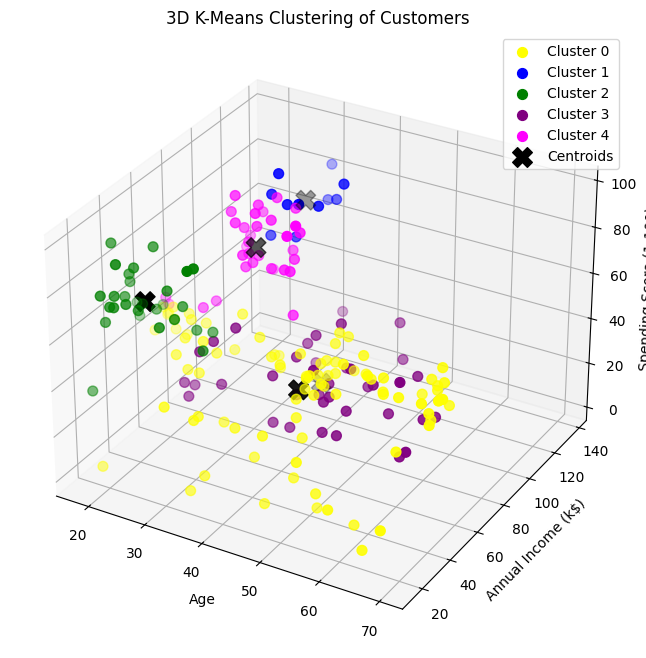

In [32]:

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


colors = ['yellow', 'blue', 'green', 'purple', 'magenta']


for i in range(k_3D):
    cluster_data = df[df['Cluster_3D'] == i]
    ax.scatter(
        cluster_data['Age'],
        cluster_data['AnnualIncome'],
        cluster_data['SpendingScore'],
        s=50,
        c=colors[i],
        label=f'Cluster {i}'
    )


ax.scatter(
    kmeans_3D.cluster_centers_[:, 0],  # Age
    kmeans_3D.cluster_centers_[:, 1],  # AnnualIncome
    kmeans_3D.cluster_centers_[:, 2],  # SpendingScore
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D K-Means Clustering of Customers')
ax.legend()
plt.show()

## 10. 3D Cluster Interpretation



Answer the following (in text, not code): `(10 pts)`

- Are there meaningful and distinguishable clusters?
- What business insights can you derive from the clusters in 3D??

In [ ]:
#Q1 - Blue Clusters has the age of 20-30 has a very high spending power and high income
#Q2 - Green cluster also has a high spending power but a low income score
#Q3 - Business insights that i can derive from the data since some has a high spending score but low income it suggest that they may borrowing money
#There are also old people that has a high spending score and a middle income score which may tell that they have a business or retired.

SyntaxError: invalid syntax (ipython-input-3198056157.py, line 1)